In [39]:
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [40]:
from bayes_opt import BayesianOptimization

In [41]:
data = pd.read_csv('D:/downloads/COVID19ML-master/COVID19ML-master/UsedCombined.txt',sep='\t')

In [42]:
data

,Unnamed: 0,Diagnosis,D,Age,Sex,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,serumLevelsOfWhiteBloodCellCategorical,lymphocytes,...,XrayResults,Diarrhea,Fever,Coughing,SoreThroat,NauseaVomitting,Temperature,Fatigue,RenalDisease,diabetes
0,0,H1N1,0,67.00,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,No,NaN,38.111111,No,NaN,NaN
1,1,H1N1,0,29.00,M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,H1N1,0,22.00,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,H1N1,0,20.00,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,No,NaN,36.555556,Yes,No,No
4,4,H1N1,0,21.00,M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1480,COVID19,1,1.40,NaN,NaN,NaN,9.2,normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,1481,COVID19,1,0.83,NaN,NaN,NaN,14.8,high,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,1482,COVID19,1,3.00,NaN,NaN,NaN,15.0,high,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,1483,COVID19,1,4.00,NaN,NaN,NaN,6.6,normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              1485 non-null   int64  
 1   Diagnosis                               1485 non-null   object 
 2   D                                       1485 non-null   int64  
 3   Age                                     1457 non-null   float64
 4   Sex                                     1409 non-null   object 
 5   neutrophil                              103 non-null    float64
 6   neutrophilCategorical                   148 non-null    object 
 7   serumLevelsOfWhiteBloodCell             151 non-null    float64
 8   serumLevelsOfWhiteBloodCellCategorical  191 non-null    object 
 9   lymphocytes                             156 non-null    float64
 10  lymphocytesCategorical                  197 non-null    obje

In [44]:
data2=data.drop(columns=['Unnamed: 0','CTscanResults','XrayResults','Sex'])

In [45]:
data2=data2.drop(columns=['Fever','NauseaVomitting','lymphocytesCategorical','serumLevelsOfWhiteBloodCellCategorical'])

In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1485 non-null   object 
 1   D                            1485 non-null   int64  
 2   Age                          1457 non-null   float64
 3   neutrophil                   103 non-null    float64
 4   neutrophilCategorical        148 non-null    object 
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   Diarrhea                     450 non-null    object 
 8   Coughing                     862 non-null    object 
 9   SoreThroat                   670 non-null    object 
 10  Temperature                  629 non-null    float64
 11  Fatigue                      531 non-null    object 
 12  RenalDisease                 226 non-null    object 
 13  diabetes          

In [47]:
data2=data2.drop(columns=["neutrophilCategorical"])

In [48]:
removeList = ['Diarrhea','Coughing','SoreThroat','Fatigue','RenalDisease','diabetes']

In [49]:
for i in removeList:
    data2 = pd.concat([data2,pd.get_dummies(data2[i], prefix=i)],axis=1)

In [50]:
data2['D'].value_counts()

0    1072
1     413
Name: D, dtype: int64

In [51]:
data2 = pd.concat([data2,pd.get_dummies(data2['D'], prefix="rt_pcr")],axis=1)

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1485 non-null   object 
 1   D                            1485 non-null   int64  
 2   Age                          1457 non-null   float64
 3   neutrophil                   103 non-null    float64
 4   serumLevelsOfWhiteBloodCell  151 non-null    float64
 5   lymphocytes                  156 non-null    float64
 6   Diarrhea                     450 non-null    object 
 7   Coughing                     862 non-null    object 
 8   SoreThroat                   670 non-null    object 
 9   Temperature                  629 non-null    float64
 10  Fatigue                      531 non-null    object 
 11  RenalDisease                 226 non-null    object 
 12  diabetes                     226 non-null    object 
 13  Diarrhea_No       

In [53]:
data2

,Diagnosis,D,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,Diarrhea,Coughing,SoreThroat,Temperature,...,SoreThroat_No,SoreThroat_Yes,Fatigue_No,Fatigue_Yes,RenalDisease_No,RenalDisease_Yes,diabetes_No,diabetes_Yes,rt_pcr_0,rt_pcr_1
0,H1N1,0,67.00,NaN,NaN,NaN,NaN,Yes,No,38.111111,...,1,0,1,0,0,0,0,0,1,0
1,H1N1,0,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,H1N1,0,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,H1N1,0,20.00,NaN,NaN,NaN,NaN,Yes,No,36.555556,...,1,0,0,1,1,0,1,0,1,0
4,H1N1,0,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,COVID19,1,1.40,NaN,9.2,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1481,COVID19,1,0.83,NaN,14.8,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1482,COVID19,1,3.00,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1483,COVID19,1,4.00,NaN,6.6,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [54]:
removeList2 = ['Diarrhea','Coughing','SoreThroat','Fatigue','RenalDisease','diabetes']

In [55]:
data3=data2.drop(columns=removeList2)

In [56]:
data3=data3.drop(columns=['D','Coughing_No'])

In [57]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1485 non-null   object 
 1   Age                          1457 non-null   float64
 2   neutrophil                   103 non-null    float64
 3   serumLevelsOfWhiteBloodCell  151 non-null    float64
 4   lymphocytes                  156 non-null    float64
 5   Temperature                  629 non-null    float64
 6   Diarrhea_No                  1485 non-null   uint8  
 7   Diarrhea_Yes                 1485 non-null   uint8  
 8   Coughing_No                  1485 non-null   uint8  
 9   Coughing_Yes                 1485 non-null   uint8  
 10  SoreThroat_No                1485 non-null   uint8  
 11  SoreThroat_Yes               1485 non-null   uint8  
 12  Fatigue_No                   1485 non-null   uint8  
 13  Fatigue_Yes       

In [58]:
data3

,Diagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,Temperature,Diarrhea_No,Diarrhea_Yes,Coughing_No,Coughing_Yes,SoreThroat_No,SoreThroat_Yes,Fatigue_No,Fatigue_Yes,RenalDisease_No,RenalDisease_Yes,diabetes_No,diabetes_Yes,rt_pcr_0,rt_pcr_1
0,H1N1,67.00,NaN,NaN,NaN,38.111111,0,0,0,1,1,0,1,0,0,0,0,0,1,0
1,H1N1,29.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,H1N1,22.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,H1N1,20.00,NaN,NaN,NaN,36.555556,0,0,0,1,1,0,0,1,1,0,1,0,1,0
4,H1N1,21.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,COVID19,1.40,NaN,9.2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1481,COVID19,0.83,NaN,14.8,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1482,COVID19,3.00,NaN,15.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1483,COVID19,4.00,NaN,6.6,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
y=data3['Diagnosis']

In [60]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [61]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [62]:
data4=data3.drop(columns=['Diagnosis'])

In [63]:
data4.columns

Index(['Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes',
       'Temperature', 'Diarrhea_No', 'Diarrhea_Yes', 'Coughing_No ',
       'Coughing_Yes', 'SoreThroat_No', 'SoreThroat_Yes', 'Fatigue_No',
       'Fatigue_Yes', 'RenalDisease_No', 'RenalDisease_Yes', 'diabetes_No',
       'diabetes_Yes', 'rt_pcr_0', 'rt_pcr_1'],
      dtype='object')

In [64]:
data4=data4.drop(columns=['rt_pcr_0','rt_pcr_1'])

In [65]:
data4

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,Temperature,Diarrhea_No,Diarrhea_Yes,Coughing_No,Coughing_Yes,SoreThroat_No,SoreThroat_Yes,Fatigue_No,Fatigue_Yes,RenalDisease_No,RenalDisease_Yes,diabetes_No,diabetes_Yes
0,67.00,NaN,NaN,NaN,38.111111,0,0,0,1,1,0,1,0,0,0,0,0
1,29.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
2,22.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,20.00,NaN,NaN,NaN,36.555556,0,0,0,1,1,0,0,1,1,0,1,0
4,21.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1.40,NaN,9.2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1481,0.83,NaN,14.8,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1482,3.00,NaN,15.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1483,4.00,NaN,6.6,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1457 non-null   float64
 1   neutrophil                   103 non-null    float64
 2   serumLevelsOfWhiteBloodCell  151 non-null    float64
 3   lymphocytes                  156 non-null    float64
 4   Temperature                  629 non-null    float64
 5   Diarrhea_No                  1485 non-null   uint8  
 6   Diarrhea_Yes                 1485 non-null   uint8  
 7   Coughing_No                  1485 non-null   uint8  
 8   Coughing_Yes                 1485 non-null   uint8  
 9   SoreThroat_No                1485 non-null   uint8  
 10  SoreThroat_Yes               1485 non-null   uint8  
 11  Fatigue_No                   1485 non-null   uint8  
 12  Fatigue_Yes                  1485 non-null   uint8  
 13  RenalDisease_No   

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data4.values, y, test_size=0.2, random_state=42)

In [82]:
XGBCL = XGBClassifier()
classifier1 = XGBCL.fit(X_train,y_train)
preds = classifier1.predict(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
X_test[0][9]==0

True

In [84]:
arr=X_test[200]

In [85]:
arr

array([13. ,  nan,  nan,  nan, 37.9,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,
        1. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [86]:
type(arr)

numpy.ndarray

In [87]:
arr_new=arr.reshape((1,-1))

In [88]:
predc=classifier1.predict_proba(arr_new)

In [89]:
predc

array([[0.00875276, 0.99124724]], dtype=float32)

In [90]:
print(classification_report(preds, y_test))
cm = confusion_matrix(preds, y_test)
acc = cm.diagonal().sum()/cm.sum()
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        98
           1       0.92      0.92      0.92       199

    accuracy                           0.89       297
   macro avg       0.88      0.88      0.88       297
weighted avg       0.89      0.89      0.89       297

0.8922558922558923


In [91]:
preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [92]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [93]:

dtrain = xgb.DMatrix(X_train, label=y_train)

In [94]:
dtrain

In [95]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
     params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
     #Cross validating with the specified parameters in 5 folds and 70 iterations
     cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
     #Return the negative RMSE
     return -1.0 * cv_result['test-rmse-mean'].iloc[-1]



In [96]:
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,120)
                                            })
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
[02:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

|  4        | -0.29     |  0.811    |  0.8436   |  3.535    |  100.4    |
[02:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be us

|  8        | -0.2791   |  0.009857 |  0.3625   |  7.624    |  100.4    |
[02:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be us

|  12       | -0.27     |  0.7708   |  0.2387   |  4.666    |  102.7    |
[02:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be us

In [97]:
params = xgb_bo.max['params']
print(params)
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

{'gamma': 0.6791920623979129, 'learning_rate': 0.2699881270467659, 'max_depth': 5.096533827526089, 'n_estimators': 102.98268038936054}


In [98]:
classifier2 = XGBClassifier(**params).fit(X_train,y_train)
preds2 = classifier2.predict(X_test)

[02:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [99]:
print(classification_report(preds2, y_test))
cm = confusion_matrix(preds2, y_test)
acc = cm.diagonal().sum()/cm.sum()
print(acc)
print(cm)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        95
           1       0.92      0.91      0.92       202

    accuracy                           0.89       297
   macro avg       0.87      0.88      0.87       297
weighted avg       0.89      0.89      0.89       297

0.8888888888888888
[[ 80  15]
 [ 18 184]]


In [100]:
lr_probs = classifier2.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [101]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.950


In [102]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [103]:

data_dmatrix = xgb.DMatrix(data=data4,label=y)
import graphviz
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

[02:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




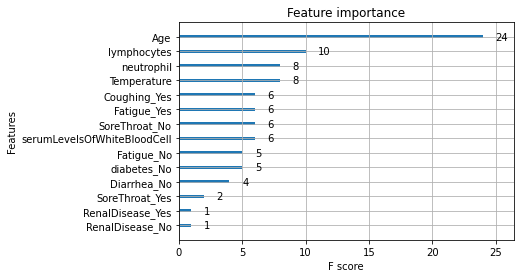

In [104]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
#plt.show()
pyplot.savefig('barWithoutNan.pdf',format='pdf')

In [105]:
pred_prob=classifier2.predict_proba(X_test)

In [106]:
pred_prob #right column gives probability of Covid19

array([[1.26638830e-01, 8.73361170e-01],
       [5.70027828e-02, 9.42997217e-01],
       [1.92749500e-03, 9.98072505e-01],
       [5.70027828e-02, 9.42997217e-01],
       [3.82702351e-02, 9.61729765e-01],
       [2.94291973e-03, 9.97057080e-01],
       [4.82281446e-02, 9.51771855e-01],
       [9.98337567e-01, 1.66243734e-03],
       [4.71512735e-01, 5.28487265e-01],
       [4.11480665e-03, 9.95885193e-01],
       [4.08250093e-02, 9.59174991e-01],
       [6.32053316e-01, 3.67946684e-01],
       [1.99022293e-02, 9.80097771e-01],
       [7.10156560e-02, 9.28984344e-01],
       [5.70027828e-02, 9.42997217e-01],
       [5.86778879e-01, 4.13221091e-01],
       [5.70027828e-02, 9.42997217e-01],
       [9.11290646e-01, 8.87093470e-02],
       [5.70027828e-02, 9.42997217e-01],
       [2.72411108e-03, 9.97275889e-01],
       [2.25051582e-01, 7.74948418e-01],
       [8.57140899e-01, 1.42859101e-01],
       [9.74840343e-01, 2.51596663e-02],
       [5.70027828e-02, 9.42997217e-01],
       [4.964954

In [107]:
preds2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [108]:
import pickle

In [109]:
pickle.dump(classifier2,open('covidpred.pkl','wb'))

In [110]:
model1=pickle.load(open('covidpred.pkl','rb'))#pickling the file

In [91]:
res_new=model1.predict_proba(X_test)

In [92]:
res_new #working

array([[9.85077620e-02, 9.01492238e-01],
       [5.27812839e-02, 9.47218716e-01],
       [6.24829531e-03, 9.93751705e-01],
       [5.27812839e-02, 9.47218716e-01],
       [4.33969498e-02, 9.56603050e-01],
       [2.86614895e-03, 9.97133851e-01],
       [4.89710569e-02, 9.51028943e-01],
       [9.98921752e-01, 1.07825478e-03],
       [5.15357852e-01, 4.84642148e-01],
       [3.12232971e-03, 9.96877670e-01],
       [2.58932710e-02, 9.74106729e-01],
       [6.42096162e-01, 3.57903868e-01],
       [1.37796402e-02, 9.86220360e-01],
       [7.73016214e-02, 9.22698379e-01],
       [5.27812839e-02, 9.47218716e-01],
       [5.25113702e-01, 4.74886298e-01],
       [5.65752983e-02, 9.43424702e-01],
       [9.55050230e-01, 4.49497476e-02],
       [5.62812090e-02, 9.43718791e-01],
       [1.87641382e-03, 9.98123586e-01],
       [1.25543594e-01, 8.74456406e-01],
       [9.32108939e-01, 6.78910837e-02],
       [9.72724438e-01, 2.72755846e-02],
       [5.62812090e-02, 9.43718791e-01],
       [5.512784

In [74]:
import pickle

In [118]:
modelxg=pickle.load(open('covidpred.pkl','rb'))

In [112]:
pred_check=modelxg.predict_proba(arr_new)

In [113]:
pred_check

array([[0.00549936, 0.99450064]], dtype=float32)

In [114]:
pred_check.shape


(1, 2)

In [115]:
pred_check[0][0]

0.005499363

In [116]:
print('Corona alert.\nProbability of corona occuring is {pr:.2f}%'.format(pr=pred_check[0][0]*100))

Corona alert.
Probability of corona occuring is 0.55%


In [98]:
arr.shape

(16, 1)

In [95]:
arr.resize(16,1)

In [96]:
arr

array([[62. ],
       [ nan],
       [ nan],
       [ nan],
       [37.9],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ]])

In [102]:
X_test.iloc[123]

Age                            62.0
neutrophil                      NaN
serumLevelsOfWhiteBloodCell     NaN
lymphocytes                     NaN
Temperature                    37.9
Diarrhea_No                     0.0
Diarrhea_Yes                    0.0
Coughing_No                     0.0
Coughing_Yes                    0.0
SoreThroat_No                   0.0
SoreThroat_Yes                  0.0
Fatigue_No                      0.0
Fatigue_Yes                     0.0
RenalDisease_No                 0.0
RenalDisease_Yes                0.0
diabetes_No                     0.0
diabetes_Yes                    0.0
Name: 1312, dtype: float64

In [53]:
rescheck=pd.DataFrame(X_test.iloc[123])

In [54]:
rescheck

,1312
Age,62.0
neutrophil,NaN
serumLevelsOfWhiteBloodCell,NaN
lymphocytes,NaN
Temperature,37.9
Diarrhea_No,0.0
Diarrhea_Yes,0.0
Coughing_No,0.0
Coughing_Yes,0.0
SoreThroat_No,0.0


In [35]:
import json

x =  '{ "name":"John", "age":30.00, "city":"New York"}'
y = json.loads(x)

print(y["age"]) 

30.0


In [36]:
type(y["age"])

float